In [1]:
#矢量化加速
%matplotlib inline
import math 
import time
from mxnet import np
from d2l import mxnet as d2l

In [2]:
n=10000
a=np.ones(n)
b=np.ones(n)

In [5]:
#定义计时器用于对运行时间进行测试,#@save标记保存到d2l软件包
class Timer: #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times=[]
        self.start()
    def start(self):
        """启动计时器"""
        self.tik=time.time()
    def stop(self):
        """停止计时器并将时间记录在列表"""
        self.times.append(time.time()-self.tik)
        return self.times[-1]
    def avg(self):
        """返回平均时间"""
        return sum(self.times)/len(self.times)
    def sum(self):
        """返回时间总和"""
        return sum(self.times)
    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [6]:
c=np.zeros(n)
timer=Timer()
for i in range(n): #用for循环对a,b按元素相加
    c[i]=a[i]+b[i]
f'{timer.stop():.5f} sec'

'3.75579 sec'

In [7]:
timer.start()
d=a+b #用+运算符对a,b按元素相加。矢量化代码通常能实现数量级的加速
f'{timer.stop():.5f} sec'

'0.00036 sec'

In [10]:
#正太分布与平方损失
def normal(x,mu,sigma): #此函数用于计算正态分布
    p=1/math.sqrt(2*math.pi*sigma**2)
    return p*np.exp(-0.5/sigma**2*(x-mu)**2)

ValueError: setting an array element with a sequence. The requested array would exceed the maximum number of dimension of 32.

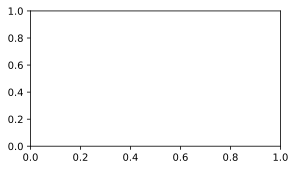

In [11]:
x=np.arange(-7,7,0.01)
params=[(0,1),(0,2),(3,1)]
d2l.plot(x,[normal(x,mu,sigma) for mu,sigma in params],xlabel='x',
        ylabel='p(x)',figsize=(4.5,2.5),
        legend=[f'mean {mu},std {sigma}' for mu,sigma in params])